In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import datetime
import cv2

In [2]:
train = os.path.join(r"C:\Users\anves\Downloads\Eye dataset\train")
test = os.path.join(r"C:\Users\anves\Downloads\Eye dataset\test")

In [3]:
# train_datagen = ImageDataGenerator(rescale=1/255)
# test_datgen = ImageDataGenerator(rescale=1/255)

# train_gen = train_datagen.flow_from_directory(
#     train,
#     classes=['closed','open'],
#     target_size=(200,200),
#     batch_size=120,
#     class_mode='binary'
# )

# test_gen = test_datgen.flow_from_directory(
#     test,
#     classes=['closed','open'],
#     target_size=(200,200),
#     batch_size=20,
#     class_mode='binary',
#     shuffle=False
# )

In [4]:
def load_data(container):
    categories = ['open','closed']
    arr = []
    for category in categories:
        path = os.path.join(container,category)
        for image in os.listdir(path):
            img_arr = cv2.imread(os.path.join(path,image))
            img_arr = cv2.resize(img_arr,(200,200))
            img_arr = img_to_array(img_arr)
            arr.append(img_arr)
    return(np.array(arr))

X_train = load_data(train)

In [5]:
print(X_train.shape)

(14360, 200, 200, 3)


In [6]:
y_train = []
def load_data_y(container):
    categories = ['open','closed']
    arr = []
    for category in categories:
        path = os.path.join(container,category)
        for image in os.listdir(path):
            if category == 'open':
                arr.append(0)
            else:
                arr.append(1)
    return(np.array(arr))

In [7]:
y_train = load_data_y(train)
print(y_train.shape)

(14360,)


In [8]:
X_test = load_data(test)
y_test = load_data_y(test)

In [9]:
#model3
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(200,200,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

# model.add(Conv2D(128, (3,3), activation='relu'))
# model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0

In [11]:
#model1VGG
# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Flatten())
# model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
# model.add(Dense(1, activation='sigmoid'))
# # compile model
# opt = SGD(learning_rate=0.001, momentum=0.9)
# model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(
    X_train,
    y_train, 
    epochs = 10, 
    validation_data=(X_test,y_test),
    verbose=1,
    callbacks=tensorboard_callback
)

Epoch 1/10
449/449 [==============================] - 21s 35ms/step - loss: 1.0803 - accuracy: 0.9410 - val_loss: 0.3816 - val_accuracy: 0.9050
Epoch 2/10
449/449 [==============================] - 15s 33ms/step - loss: 0.0475 - accuracy: 0.9840 - val_loss: 0.1421 - val_accuracy: 0.9650
Epoch 3/10
449/449 [==============================] - 14s 31ms/step - loss: 0.3378 - accuracy: 0.9027 - val_loss: 0.3664 - val_accuracy: 0.8300
Epoch 4/10
449/449 [==============================] - 15s 33ms/step - loss: 0.1202 - accuracy: 0.9570 - val_loss: 0.8152 - val_accuracy: 0.7750
Epoch 5/10
449/449 [==============================] - 14s 31ms/step - loss: 0.0751 - accuracy: 0.9756 - val_loss: 0.2919 - val_accuracy: 0.9000
Epoch 6/10
449/449 [==============================] - 14s 32ms/step - loss: 0.0803 - accuracy: 0.9713 - val_loss: 0.1448 - val_accuracy: 0.9500
Epoch 7/10
449/449 [==============================] - 14s 32ms/step - loss: 0.1016 - accuracy: 0.9698 - val_loss: 0.2877 - val_accuracy:

In [13]:
#%tensorboard --logdir logs/fit

In [14]:
model.save('model3.h5')

In [15]:
# def load_image(filename):
# 	# load the image
# 	img = cv2.imread(filename)
# 	cv2.imshow('input',img)
# 	img = cv2.resize(img,(200,200))
# 	#img = load_img(filename, target_size=(200,200))
# 	# convert to array
# 	img = img_to_array(img)
# 	# reshape into a single sample with 3 channels
# 	#img = img.reshape(1, 200, 200, 3)
# 	# center pixel data
# 	#img = img.astype('float32')
# 	#img = img - [123.68, 116.779, 103.939]
# 	img = np.array(img)
# 	img = img.reshape(1,200,200,3)
# 	print(img.shape)
# 	return(img)

# # load an image and predict the class
# def run_example():
# 	# load the image
# 	#img1 = load_image(r'C:\Users\anves\Pictures\Camera Roll\closeeye.jpg')
# 	#img2 = load_image(r'C:\Users\anves\Pictures\Camera Roll\openeye.jpg')
# 	# load model
# 	#model = load_model('model3.h5')
# 	# predict the class
# 	print(model.predict(load_image(os.path.join(test,r'forward_look (3).jpg'))))
# 	#print(model.predict(img1)[0]," ",model.predict(img2)[0])

# # entry point, run the example
# run_example()

[0.]


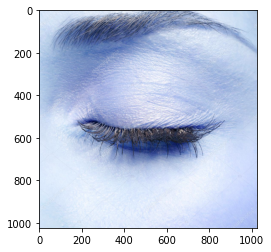

In [41]:
#test_image = cv2.imread(r'C:\Users\anves\Downloads\Eye dataset\test\closed\eye_closed(39).png')
#test_image = cv2.imread(r'C:\Users\anves\Pictures\Camera Roll\openeye.jpg')
test_image = cv2.imread(r'C:\Users\anves\Downloads\close_eye_google.jpg')
plt.imshow(test_image)
test_image = cv2.resize(test_image,(200,200))
test_image = img_to_array(test_image)
test_image = np.array(test_image)
test_image = test_image.reshape(1,200,200,3)
#model = load_model('model3.h5')
result = model.predict(test_image)
print(result[0])

TypeError: Invalid shape (1, 200, 200, 3) for image data

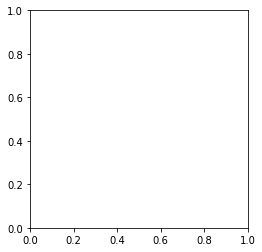

In [24]:
import matplotlib.pyplot as plt
